In [1]:
# Import various libraries
import pandas as pd
import os
from matplotlib.pyplot import *
import numpy as np
import IPython
from IPython.display import Javascript, display
from ipywidgets import *
import tkinter as tk
from tkinter import filedialog
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import geopandas as gpd 

ion()
from IPython.display import HTML
from matplotlib import ticker

import re
%matplotlib inline

from numpy import meshgrid

import matplotlib as mpl
from matplotlib import ticker

#import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
from pyproj import CRS

venus_geographic_crs = CRS.from_proj4("+proj=longlat +R=6051800 +no_defs")
venus_projected_crs  = CRS.from_proj4(
    "+proj=moll +R=6051800 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +units=m +no_defs"
)

Venus_corona_active = gpd.read_file(f"../../active_corona_shape/active_corona.shp")
Venus_corona_active = Venus_corona_active.set_crs(venus_geographic_crs)
Venus_corona_active = Venus_corona_active.to_crs(venus_projected_crs)

# get areas of Venus tectonic settings 
path_Venus_data = os.path.join("../tectonic_settings_Venus")

Venus_coronae   = gpd.read_file(f"{path_Venus_data}/corona.shp")
#Venus_coronae = Venus_coronae.set_crs(venus_geographic_crs)
Venus_coronae = Venus_coronae.to_crs(venus_projected_crs)

intersection = Venus_corona_active.iloc[0].geometry.buffer(0).intersection(Venus_coronae.unary_union.buffer(0))

area_Venus_coronae_active = intersection.area/1e6

In [3]:
# INPUT

# decide which extras you want to include in the plot for reference / checking the results 
plot_reference_lines_moment_magnitudes = 0
plot_Earth_slopes                      = 0
plot_Venus_scaled                      = 0
plot_Earth_reference_line              = 1

# colours for plotting from https://davidmathlogic.com/colorblind/#%23648FFF-%23785EF0-%23DC267F-%23FE6100-%23FFB000
colour_Global           = [4/255,    1/255,    150/255]        # black
colour_Subduction       = [220/255,  38/255,   127/255]  # pink 
colour_Collision        = [120/255,  94/255,   240/255]  # purple
colour_Transform        = [255/255,  176/255,  0/255  ]  # orange
colour_Rifts            = [254/255,  97/255,   0/255  ]  # dark orange
colour_Ridges           = [247/255,  230/255,  20/255 ]  # yellow
colour_IntraOceanic     = [100/255,  143/255,  255/255]  # light blue 
colour_IntraContinental = [85/255,   210/255,  201/255]  # green
colour_IntraPlate       = [122/255,  122/255,  122/255]  # grey

# define scaling factors for different settings 
area_Earth_total    = 510064472 # km2

area_Earth_subduction       = 26164756.467        # km2
area_Earth_collision        = 11394312.460        # km2
area_Earth_rifts            = 11049695.415        # km2
area_Earth_ridges           = 23975223.252        # km2
area_Earth_transform        = 15480054.171        # km2
area_Earth_intracontinental = 164742834.151540 # km2
area_Earth_intraoceanic     = area_Earth_total - area_Earth_subduction - area_Earth_collision - area_Earth_rifts - area_Earth_ridges - area_Earth_transform - area_Earth_intracontinental
area_Earth_intraplate_total = area_Earth_intracontinental + area_Earth_intraoceanic 

print(f"Area Earth subduction:       {round(area_Earth_subduction,2)} km2    ||   {round(area_Earth_subduction/area_Earth_total*100,2)}% of total area")
print(f"Area Earth collision:        {round(area_Earth_collision,2)} km2    ||   {round(area_Earth_collision/area_Earth_total*100,2)}% of total area")
print(f"Area Earth rifts:            {round(area_Earth_rifts,2)} km2    ||   {round(area_Earth_rifts/area_Earth_total*100,2)}% of total area")
print(f"Area Earth ridges:           {round(area_Earth_ridges,2)} km2    ||   {round(area_Earth_ridges/area_Earth_total*100,2)}% of total area")
print(f"Area Earth transform:        {round(area_Earth_transform,2)} km2    ||   {round(area_Earth_transform/area_Earth_total*100,2)}% of total area")
print(f"Area Earth intracontinental: {round(area_Earth_intracontinental,2)} km2   ||   {round(area_Earth_intracontinental/area_Earth_total*100,2)}% of total area")
print(f"Area Earth intraoceanic:     {round(area_Earth_intraoceanic,2)} km2   ||   {round(area_Earth_intraoceanic/area_Earth_total*100,2)}% of total area")
print(f"Area Earth intraplate total: {round(area_Earth_intraplate_total,2)} km2   ||   {round(area_Earth_intraplate_total/area_Earth_total*100,2)}% of total area")

print(f" ")

# get areas of Venus tectonic settings 
path_Venus_data = os.path.join("../tectonic_settings_Venus")

Venus_rifts     = gpd.read_file(f"{path_Venus_data}/rifts.shp")
Venus_coronae   = gpd.read_file(f"{path_Venus_data}/corona.shp")
Venus_ridges    = gpd.read_file(f"{path_Venus_data}/ridges.shp")

area_Venus_total      = 460234317 # km2

area_Venus_rifts      = Venus_rifts['Area_julia'].sum()
area_Venus_coronae    = Venus_coronae['Area_julia'].sum()
#area_Venus_coronae_active = Venus_coronae['Area_julia'].sum() ## TO FIX
area_Venus_ridges     = Venus_ridges['Area_julia'].sum()
area_Venus_intraplate = area_Venus_total - area_Venus_rifts - area_Venus_coronae - area_Venus_ridges
area_Venus_intraplate_active = area_Venus_total - area_Venus_rifts - area_Venus_coronae_active - area_Venus_ridges

fraction_of_active_coronae = 37 / (37 + 35 + 61) # Gulcher et al 2020

print(f"Area Venus rifts:           {round(area_Venus_rifts,2)}  km2    ||   {round(area_Venus_rifts/area_Venus_total*100,2)}% of total area")
print(f"Area Venus coronae:         {round(area_Venus_coronae,2)}  km2    ||   {round(area_Venus_coronae/area_Venus_total*100,2)}% of total area")
print(f"Area Venus ridges:          {round(area_Venus_ridges,2)}   km2    ||   {round(area_Venus_ridges/area_Venus_total*100,2)}% of total area")
print(f"Area Venus intraplate:      {round(area_Venus_intraplate,2)} km2    ||   {round(area_Venus_intraplate/area_Venus_total*100,2)}% of total area")
print(" ")

# determine the scaling factors of the seismogenic zone depth 
area_Earth_continental_crust             = 216846450.154319406
area_Earth_oceanic_crust                 = area_Earth_total - area_Earth_continental_crust
seismogenic_zone_depth_continental_crust = 14 # km --> Wright et al. 2013 
seismogenic_zone_depth_oceanic_crust     = 36.5 # km --> McKenzie et al. 2005 / Richards et al. 2018 / Van Zelst et al. (submitted)

Earth_average_seismogenic_zone_thickness = (area_Earth_continental_crust * seismogenic_zone_depth_continental_crust + area_Earth_oceanic_crust * seismogenic_zone_depth_oceanic_crust) / area_Earth_total
print("Average seismogenic zone thickness Earth: ",round(Earth_average_seismogenic_zone_thickness,2)," km")
print(" ")

Venus_seismogenic_zone_thickness_min     = 7.3  # km
Venus_seismogenic_zone_thickness_max     = 22.7 # km

seismogenic_depth_ratio_min = Venus_seismogenic_zone_thickness_min / Earth_average_seismogenic_zone_thickness
seismogenic_depth_ratio_max = Venus_seismogenic_zone_thickness_max / Earth_average_seismogenic_zone_thickness
print("Minimum scaling factor seismogenic depth between Earth and Venus:",round(seismogenic_depth_ratio_min,2))
print("Maximum scaling factor seismogenic depth between Earth and Venus:",round(seismogenic_depth_ratio_max,2))
print(" ")

# determine the total scaling factors for our 3 scenarios 

# INACTIVE VENUS 
# Assumption: Venus is currently tectonically inactive and has a global background seismicity rate comparable to 
# Earth's continental intraplate seismicity 
inactive_Venus_intraplate_scaling_min   = (area_Venus_total / area_Earth_intracontinental) * seismogenic_depth_ratio_min
inactive_Venus_intraplate_scaling_max   = (area_Venus_total / area_Earth_intracontinental) * seismogenic_depth_ratio_max

print("INACTIVE VENUS")
print("Scaling factor minimum:", round(inactive_Venus_intraplate_scaling_min,2))
print("Scaling factor maximum:", round(inactive_Venus_intraplate_scaling_max,2))
print(" ")

# ACTIVE VENUS - lower bound 
# Assumption: Venus is currently tectonically active and we scale according to the following rules to obtain a lower bound: 
# - the corona on Venus have similar seismicity to subduction zones on Earth
# - the fraction of active coronae (from Gulcher et al. 2020) are considered similar to the seismicity of 
#   subduction zones on Earth 
# - the fraction of inactive coronae are treated as background seismicity analogous to continental intraplate seismicity on Earth 
# - the ridges of Venus have similar seismicity as the collision zones on Earth 
# - the rifts on Venus have similar seismicity as ... 
# - the rest of Venus has a background seismicity rate analogous to continental intraplate seismicity on Earth

active_low_Venus_coronae_active_scaling_min    = ((area_Venus_coronae_active) / area_Earth_subduction) * seismogenic_depth_ratio_min
active_low_Venus_coronae_active_scaling_max    = ((area_Venus_coronae_active) / area_Earth_subduction) * seismogenic_depth_ratio_max

active_low_Venus_coronae_scaling_min    = ((fraction_of_active_coronae * area_Venus_coronae) / area_Earth_subduction) * seismogenic_depth_ratio_min
active_low_Venus_coronae_scaling_max    = ((fraction_of_active_coronae * area_Venus_coronae) / area_Earth_subduction) * seismogenic_depth_ratio_max

active_low_Venus_ridges_scaling_min     = (area_Venus_ridges / area_Earth_collision) * seismogenic_depth_ratio_min
active_low_Venus_ridges_scaling_max     = (area_Venus_ridges / area_Earth_collision) * seismogenic_depth_ratio_max

active_low_Venus_rifts_scaling_min      = (area_Venus_rifts / area_Earth_rifts) * seismogenic_depth_ratio_min
active_low_Venus_rifts_scaling_max      = (area_Venus_rifts / area_Earth_rifts) * seismogenic_depth_ratio_max

active_low_Venus_intraplate_scaling_min = ((area_Venus_intraplate + (1-fraction_of_active_coronae)*area_Venus_coronae) / area_Earth_intracontinental) * seismogenic_depth_ratio_min
active_low_Venus_intraplate_scaling_max = ((area_Venus_intraplate + (1-fraction_of_active_coronae)*area_Venus_coronae) / area_Earth_intracontinental) * seismogenic_depth_ratio_max

active_low_Venus_intraplate_active_scaling_min = ((area_Venus_intraplate_active + 0.) / area_Earth_intracontinental) * seismogenic_depth_ratio_min
active_low_Venus_intraplate_active_scaling_max = ((area_Venus_intraplate_active + 0.) / area_Earth_intracontinental) * seismogenic_depth_ratio_max

print("ACTIVE VENUS - Anna - lower bound")
print("Scaling factor coronae minimum:   ", round(active_low_Venus_coronae_active_scaling_min,2))
print("Scaling factor coronae maximum:   ", round(active_low_Venus_coronae_active_scaling_max,2))
print("Scaling factor ridges minimum:    ", round(active_low_Venus_ridges_scaling_min,2))
print("Scaling factor ridges maximum:    ", round(active_low_Venus_ridges_scaling_max,2))
print("Scaling factor rifts minimum:     ", round(active_low_Venus_rifts_scaling_min,2))
print("Scaling factor rifts maximum:     ", round(active_low_Venus_rifts_scaling_max,2))
print("Scaling factor intraplate minimum:", round(active_low_Venus_intraplate_active_scaling_min,2))
print("Scaling factor intraplate maximum:", round(active_low_Venus_intraplate_active_scaling_max,2))
print(" ")

print("ACTIVE VENUS - lower bound")
print("Scaling factor coronae minimum:   ", round(active_low_Venus_coronae_scaling_min,2))
print("Scaling factor coronae maximum:   ", round(active_low_Venus_coronae_scaling_max,2))
print("Scaling factor ridges minimum:    ", round(active_low_Venus_ridges_scaling_min,2))
print("Scaling factor ridges maximum:    ", round(active_low_Venus_ridges_scaling_max,2))
print("Scaling factor rifts minimum:     ", round(active_low_Venus_rifts_scaling_min,2))
print("Scaling factor rifts maximum:     ", round(active_low_Venus_rifts_scaling_max,2))
print("Scaling factor intraplate minimum:", round(active_low_Venus_intraplate_scaling_min,2))
print("Scaling factor intraplate maximum:", round(active_low_Venus_intraplate_scaling_max,2))
print(" ")

# ACTIVE VENUS - upper bound 
# Assumption: Venus is currently tectonically active and we scale according to the following rules to obtain an upper bound:
# - the corona on Venus have similar seismicity to subduction zones on Earth
# - all corona are considered as active and therefore have similar seismicity as subduction zones on Earth 
# - the ridges of Venus have similar seismicity as the collision zones on Earth 
# - the rifts on Venus have similar seismicity as ... 
# - the rest of Venus has a background seismicity rate analogous to continental intraplate seismicity on Earth

active_high_Venus_coronae_scaling_min    = (area_Venus_coronae / area_Earth_subduction) * seismogenic_depth_ratio_min
active_high_Venus_coronae_scaling_max    = (area_Venus_coronae / area_Earth_subduction) * seismogenic_depth_ratio_max

active_high_Venus_ridges_scaling_min     = (area_Venus_ridges / area_Earth_collision) * seismogenic_depth_ratio_min
active_high_Venus_ridges_scaling_max     = (area_Venus_ridges / area_Earth_collision) * seismogenic_depth_ratio_max

active_high_Venus_rifts_scaling_min      = (area_Venus_rifts / area_Earth_ridges) * seismogenic_depth_ratio_min
active_high_Venus_rifts_scaling_max      = (area_Venus_rifts / area_Earth_ridges) * seismogenic_depth_ratio_max

active_high_Venus_intraplate_scaling_min = (area_Venus_intraplate / area_Earth_intracontinental) * seismogenic_depth_ratio_min
active_high_Venus_intraplate_scaling_max = (area_Venus_intraplate / area_Earth_intracontinental) * seismogenic_depth_ratio_max

print("ACTIVE VENUS - upper bound")
print("Scaling factor coronae minimum:   ", round(active_high_Venus_coronae_scaling_min,2))
print("Scaling factor coronae maximum:   ", round(active_high_Venus_coronae_scaling_max,2))
print("Scaling factor ridges minimum:    ", round(active_high_Venus_ridges_scaling_min,2))
print("Scaling factor ridges maximum:    ", round(active_high_Venus_ridges_scaling_max,2))
print("Scaling factor rifts minimum:     ", round(active_high_Venus_rifts_scaling_min,2))
print("Scaling factor rifts maximum:     ", round(active_high_Venus_rifts_scaling_max,2))
print("Scaling factor intraplate minimum:", round(active_high_Venus_intraplate_scaling_min,2))
print("Scaling factor intraplate maximum:", round(active_high_Venus_intraplate_scaling_max,2))


Area Earth subduction:       26164756.47 km2    ||   5.13% of total area
Area Earth collision:        11394312.46 km2    ||   2.23% of total area
Area Earth rifts:            11049695.41 km2    ||   2.17% of total area
Area Earth ridges:           23975223.25 km2    ||   4.7% of total area
Area Earth transform:        15480054.17 km2    ||   3.03% of total area
Area Earth intracontinental: 164742834.15 km2   ||   32.3% of total area
Area Earth intraoceanic:     257257596.08 km2   ||   50.44% of total area
Area Earth intraplate total: 422000430.24 km2   ||   82.73% of total area
 
Area Venus rifts:           37967130.85  km2    ||   8.25% of total area
Area Venus coronae:         35718832.79  km2    ||   7.76% of total area
Area Venus ridges:          7568096.24   km2    ||   1.64% of total area
Area Venus intraplate:      378980257.12 km2    ||   82.35% of total area
 
Average seismogenic zone thickness Earth:  26.93  km
 
Minimum scaling factor seismogenic depth between Earth and Venu

In [4]:
# functions to calculate the desired curves from the CMT catalogue format 

def xValues(resolution):
    minScalar = np.amin(sorted_earthquakes["Exponent"].astype(float)) #minimal scalar of seismic moments within CMT catalog
    maxScalar = np.amax(sorted_earthquakes["Exponent"].astype(float)) #maximum scalar of seismic moments within CMT catalog
    
    #evenly spaces points between minimal and maximum scalar of CMT catalog
    xValues = np.logspace(minScalar, maxScalar, base=10.0, num=resolution, endpoint=True)
    return xValues.tolist()

def yValues(xValues):
    yValues = []
    #adds number of events in CMT catalog that have a seismic moment bigger than xValue, averaged to one year, to list
    for i in range(len(xValues)):
        yValues.append(((sorted_earthquakes[sorted_earthquakes["Moment"].astype(float) >= xValues[i]]).shape[0])/(2021-1976))

    return yValues

In [5]:
# LOAD & PREP ALL THE DATA FOR PLOTTING - EARTH 

resolution = 100 

# Earth - CMT catalogue: total (global)
sorted_earthquakes = pd.read_csv("./earthquake_data/cmt_2020.csv")
xCmt = xValues(resolution)
yCmt = yValues(xCmt)

# Earth - CMT catalogue: collisions 
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-collision.csv")
xCollision = xValues(resolution)
yCollision = yValues(xCollision)

# Earth - CMT catalogue: subduction zones 
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-subduction.csv")
xSubduction = xValues(resolution)
ySubduction = yValues(xSubduction)

# Earth - CMT catalogue: strike-slip / transform faults 
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-transform.csv")
xTransform = xValues(resolution)
yTransform = yValues(xTransform)

# Earth - CMT catalogue: rifts / extensional features 
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-rifts.csv")
xRifts = xValues(resolution)
yRifts = yValues(xRifts)

# Earth - CMT catalogue: mid-oceanic ridges 
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-spreading.csv")
xRidges = xValues(resolution)
yRidges = yValues(xRidges)

# Earth - CMT catalogue: intraoceanic earthquakes
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-intraplate-oceanic.csv")
xIntraOceanic = xValues(resolution)
yIntraOceanic = yValues(xIntraOceanic)

# Earth - CMT catalogue: intracontinental earthquakes
sorted_earthquakes = pd.read_csv("./earthquake_data/quakes-intraplate-continental.csv")
xIntraContinental = xValues(resolution)
yIntraContinental = yValues(xIntraContinental)
    
# Earth - CMT catalogue: all intraplate earthquakes (i.e., oceanic intraplate + continental intraplate) 
sorted_earthquakes_dummy1 = pd.read_csv("./earthquake_data/quakes-intraplate-oceanic.csv")
sorted_earthquakes_dummy2 = pd.read_csv("./earthquake_data/quakes-intraplate-continental.csv")
sorted_earthquakes = pd.concat([sorted_earthquakes_dummy1, sorted_earthquakes_dummy2])
xIntraPlate = xValues(resolution)
yIntraPlate = yValues(xIntraPlate)
    
    
# ----- Calculate the slope of the global seismicity on Earth from the CMT catalogue ----- #
for which_slope in range(0,9,1):
    
    if(  which_slope == 0):
        data_array_x = xCmt 
        data_array_y = yCmt 
    elif(which_slope == 1):
        data_array_x = xSubduction
        data_array_y = ySubduction
    elif(which_slope == 2):
        data_array_x = xCollision
        data_array_y = yCollision
    elif(which_slope == 3):
        data_array_x = xTransform
        data_array_y = yTransform 
    elif(which_slope == 4):
        data_array_x = xRifts
        data_array_y = yRifts
    elif(which_slope == 5):
        data_array_x = xRidges
        data_array_y = yRidges 
    elif(which_slope == 6):
        data_array_x = xIntraOceanic
        data_array_y = yIntraOceanic
    elif(which_slope == 7):
        data_array_x = xIntraContinental 
        data_array_y = yIntraContinental
    elif(which_slope == 8):
        data_array_x = xIntraPlate
        data_array_y = yIntraPlate
    
    size_array = len(data_array_x)

    counter = 0 
    indices_to_calculate_slope = np.zeros(size_array)
    for i in range(0,size_array):
        if (data_array_x[i] >= 1e17 and data_array_x[i] <= 1e19):
            indices_to_calculate_slope[counter] = i
            counter = counter + 1 
        
    indices_to_calculate_slope = indices_to_calculate_slope[0:counter]
    indices_to_calculate_slope = indices_to_calculate_slope.astype(int)
    
    calculate_slope_x = [ data_array_x[i] for i in  indices_to_calculate_slope]
    calculate_slope_y = [ data_array_y[i] for i in  indices_to_calculate_slope]

    #slope
    slope, intercept = np.polyfit(np.log10(calculate_slope_x), np.log10(calculate_slope_y), 1)
    b_value, a_value = np.polyfit(((np.log10(calculate_slope_x)-9.05)/1.5), np.log10(calculate_slope_y), 1)
    
    if(  which_slope == 0):
        calculate_slope_x_EarthGlobal = calculate_slope_x
        calculate_slope_y_EarthGlobal = calculate_slope_y
        slope_EarthGlobal             = slope
        intercept_EarthGlobal         = intercept
        b_value_EarthGlobal           = b_value
        a_value_EarthGlobal           = a_value
    elif(which_slope == 1):
        calculate_slope_x_EarthSubduction = calculate_slope_x
        calculate_slope_y_EarthSubduction = calculate_slope_y
        slope_EarthSubduction             = slope
        intercept_EarthSubduction         = intercept
        b_value_EarthSubduction           = b_value
        a_value_EarthSubduction           = a_value
    elif(which_slope == 2):
        calculate_slope_x_EarthCollision = calculate_slope_x
        calculate_slope_y_EarthCollision = calculate_slope_y
        slope_EarthCollision             = slope
        intercept_EarthCollision         = intercept
        b_value_EarthCollision           = b_value
        a_value_EarthCollision           = a_value
    elif(which_slope == 3):
        calculate_slope_x_EarthTransform = calculate_slope_x
        calculate_slope_y_EarthTransform = calculate_slope_y
        slope_EarthTransform             = slope
        intercept_EarthTransform         = intercept
        b_value_EarthTransform           = b_value
        a_value_EarthTransform           = a_value
    elif(which_slope == 4):
        calculate_slope_x_EarthRifts = calculate_slope_x
        calculate_slope_y_EarthRifts = calculate_slope_y
        slope_EarthRifts             = slope
        intercept_EarthRifts         = intercept
        b_value_EarthRifts           = b_value
        a_value_EarthRifts           = a_value
    elif(which_slope == 5):
        calculate_slope_x_EarthRidges = calculate_slope_x
        calculate_slope_y_EarthRidges = calculate_slope_y
        slope_EarthRidges             = slope
        intercept_EarthRidges         = intercept
        b_value_EarthRidges           = b_value
        a_value_EarthRidges           = a_value
    elif(which_slope == 6):
        calculate_slope_x_EarthIntraOceanic = calculate_slope_x
        calculate_slope_y_EarthIntraOceanic = calculate_slope_y
        slope_EarthIntraOceanic             = slope
        intercept_EarthIntraOceanic         = intercept
        b_value_EarthIntraOceanic           = b_value
        a_value_EarthIntraOceanic           = a_value
    elif(which_slope == 7):
        calculate_slope_x_EarthIntraContinental = calculate_slope_x
        calculate_slope_y_EarthIntraContinental = calculate_slope_y
        slope_EarthIntraContinental             = slope
        intercept_EarthIntraContinental         = intercept
        b_value_EarthIntraContinental           = b_value
        a_value_EarthIntraContinental           = a_value
    elif(which_slope == 8):
        calculate_slope_x_EarthIntraPlate = calculate_slope_x
        calculate_slope_y_EarthIntraPlate = calculate_slope_y
        slope_EarthIntraPlate             = slope
        intercept_EarthIntraPlate         = intercept
        b_value_EarthIntraPlate           = b_value
        a_value_EarthIntraPlate           = a_value
    
# ---------------------------------------------------------------------------------------- #

In [19]:
slope_EarthGlobal

-0.6590366497863146

In [10]:
a_value_EarthSubduction, b_value_EarthSubduction

(7.734221197723404, -0.9573981848082569)

In [11]:
# PREP ALL THE DATA FOR PLOTTING - VENUS - GLOBAL ESTIMATES - INACTIVE VENUS 

# ----- INACTIVE VENUS - intraplate ----- #
venus_inactive_x_slope_min = [i for i in calculate_slope_x_EarthIntraContinental]
venus_inactive_y_slope_min = [i * inactive_Venus_intraplate_scaling_min for i in calculate_slope_y_EarthIntraContinental]

venus_inactive_x_slope_max = [i for i in calculate_slope_x_EarthIntraContinental]
venus_inactive_y_slope_max = [i * inactive_Venus_intraplate_scaling_max for i in calculate_slope_y_EarthIntraContinental]

slope_venus_inactive_min, intercept_venus_inactive_min = np.polyfit(np.log10(venus_inactive_x_slope_min), np.log10(venus_inactive_y_slope_min), 1)
slope_venus_inactive_max, intercept_venus_inactive_max = np.polyfit(np.log10(venus_inactive_x_slope_max), np.log10(venus_inactive_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #


In [12]:
# CALCULATE TOTAL GLOBAL SEISMICITY FOR INACTIVE VENUS 

venus_inactive_x     = np.logspace(13, 23, base=10.0, num=resolution, endpoint=True)
venus_inactive_y_min = [0] * venus_inactive_x
venus_inactive_y_max = [0] * venus_inactive_x

for i in range(0,resolution,1):
            
    slope_min     = slope_venus_inactive_min
    intercept_min = intercept_venus_inactive_min
        
    slope_max     = slope_venus_inactive_max
    intercept_max = intercept_venus_inactive_max
    
    venus_inactive_y_min[i] = venus_inactive_y_min[i] + pow(10,np.log10(venus_inactive_x[i])*slope_min+intercept_min)
    venus_inactive_y_max[i] = venus_inactive_y_max[i] + pow(10,np.log10(venus_inactive_x[i])*slope_max+intercept_max)
    

In [13]:
# PREP ALL THE DATA FOR PLOTTING - VENUS - GLOBAL ESTIMATES - ACTIVE VENUS - lower bound

# ----- ACTIVE VENUS - lower bound - Coronae ----- #
venus_active_low_coronae_x_min = [i for i in xSubduction]
venus_active_low_coronae_y_min = [i * active_low_Venus_coronae_scaling_min for i in ySubduction]
    
venus_active_low_coronae_x_max = [i for i in xSubduction]
venus_active_low_coronae_y_max = [i * active_low_Venus_coronae_scaling_max for i in ySubduction]

venus_active_low_coronae_x_slope_min = [i for i in calculate_slope_x_EarthSubduction]
venus_active_low_coronae_y_slope_min = [i * active_low_Venus_coronae_scaling_min for i in calculate_slope_y_EarthSubduction]

venus_active_low_coronae_x_slope_max = [i for i in calculate_slope_x_EarthSubduction]
venus_active_low_coronae_y_slope_max = [i * active_low_Venus_coronae_scaling_max for i in calculate_slope_y_EarthSubduction]

slope_venus_active_low_coronae_min, intercept_venus_active_low_coronae_min = np.polyfit(np.log10(venus_active_low_coronae_x_slope_min), np.log10(venus_active_low_coronae_y_slope_min), 1)
slope_venus_active_low_coronae_max, intercept_venus_active_low_coronae_max = np.polyfit(np.log10(venus_active_low_coronae_x_slope_max), np.log10(venus_active_low_coronae_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #

# ----- ACTIVE VENUS - lower bound - Coronae Anna ----- #
venus_active_low_coronae_active_x_min = [i for i in xSubduction]
venus_active_low_coronae_active_y_min = [i * active_low_Venus_coronae_active_scaling_min for i in ySubduction]
    
venus_active_low_coronae_active_x_max = [i for i in xSubduction]
venus_active_low_coronae_active_y_max = [i * active_low_Venus_coronae_active_scaling_max for i in ySubduction]

venus_active_low_coronae_active_x_slope_min = [i for i in calculate_slope_x_EarthSubduction]
venus_active_low_coronae_active_y_slope_min = [i * active_low_Venus_coronae_active_scaling_min for i in calculate_slope_y_EarthSubduction]

venus_active_low_coronae_active_x_slope_max = [i for i in calculate_slope_x_EarthSubduction]
venus_active_low_coronae_active_y_slope_max = [i * active_low_Venus_coronae_active_scaling_max for i in calculate_slope_y_EarthSubduction]

slope_venus_active_low_coronae_active_min, intercept_venus_active_low_coronae_active_min = np.polyfit(np.log10(venus_active_low_coronae_active_x_slope_min), np.log10(venus_active_low_coronae_active_y_slope_min), 1)
slope_venus_active_low_coronae_active_max, intercept_venus_active_low_coronae_active_max = np.polyfit(np.log10(venus_active_low_coronae_active_x_slope_max), np.log10(venus_active_low_coronae_active_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #

# ----- ACTIVE VENUS - lower bound - Ridges ----- #
venus_active_low_ridges_x_min = [i for i in xCollision]
venus_active_low_ridges_y_min = [i * active_low_Venus_ridges_scaling_min for i in yCollision]
    
venus_active_low_ridges_x_max = [i for i in xCollision]
venus_active_low_ridges_y_max = [i * active_low_Venus_ridges_scaling_max for i in yCollision]

venus_active_low_ridges_x_slope_min = [i for i in calculate_slope_x_EarthCollision]
venus_active_low_ridges_y_slope_min = [i * active_low_Venus_ridges_scaling_min for i in calculate_slope_y_EarthCollision]

venus_active_low_ridges_x_slope_max = [i for i in calculate_slope_x_EarthCollision]
venus_active_low_ridges_y_slope_max = [i * active_low_Venus_ridges_scaling_max for i in calculate_slope_y_EarthCollision]

slope_venus_active_low_ridges_min, intercept_venus_active_low_ridges_min = np.polyfit(np.log10(venus_active_low_ridges_x_slope_min), np.log10(venus_active_low_ridges_y_slope_min), 1)
slope_venus_active_low_ridges_max, intercept_venus_active_low_ridges_max = np.polyfit(np.log10(venus_active_low_ridges_x_slope_max), np.log10(venus_active_low_ridges_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #
  

# ----- ACTIVE VENUS - lower bound - Rifts ----- #
venus_active_low_rifts_x_min = [i for i in xRifts]
venus_active_low_rifts_y_min = [i * active_low_Venus_rifts_scaling_min for i in yRifts]
    
venus_active_low_rifts_x_max = [i for i in xRifts]
venus_active_low_rifts_y_max = [i * active_low_Venus_rifts_scaling_max for i in yRifts]

venus_active_low_rifts_x_slope_min = [i for i in calculate_slope_x_EarthRifts]
venus_active_low_rifts_y_slope_min = [i * active_low_Venus_rifts_scaling_min for i in calculate_slope_y_EarthRifts]

venus_active_low_rifts_x_slope_max = [i for i in calculate_slope_x_EarthRifts]
venus_active_low_rifts_y_slope_max = [i * active_low_Venus_rifts_scaling_max for i in calculate_slope_y_EarthRifts]

slope_venus_active_low_rifts_min, intercept_venus_active_low_rifts_min = np.polyfit(np.log10(venus_active_low_rifts_x_slope_min), np.log10(venus_active_low_rifts_y_slope_min), 1)
slope_venus_active_low_rifts_max, intercept_venus_active_low_rifts_max = np.polyfit(np.log10(venus_active_low_rifts_x_slope_max), np.log10(venus_active_low_rifts_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #
   
# ----- ACTIVE VENUS - lower bound - Intraplate ----- #
venus_active_low_intraplate_x_min = [i for i in xIntraContinental]
venus_active_low_intraplate_y_min = [i * active_low_Venus_intraplate_scaling_min for i in yIntraContinental]
    
venus_active_low_intraplate_x_max = [i for i in xIntraContinental]
venus_active_low_intraplate_y_max = [i * active_low_Venus_intraplate_scaling_max for i in yIntraContinental]

venus_active_low_intraplate_x_slope_min = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_low_intraplate_y_slope_min = [i * active_low_Venus_intraplate_scaling_min for i in calculate_slope_y_EarthIntraContinental]

venus_active_low_intraplate_x_slope_max = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_low_intraplate_y_slope_max = [i * active_low_Venus_intraplate_scaling_max for i in calculate_slope_y_EarthIntraContinental]

slope_venus_active_low_intraplate_min, intercept_venus_active_low_intraplate_min = np.polyfit(np.log10(venus_active_low_intraplate_x_slope_min), np.log10(venus_active_low_intraplate_y_slope_min), 1)
slope_venus_active_low_intraplate_max, intercept_venus_active_low_intraplate_max = np.polyfit(np.log10(venus_active_low_intraplate_x_slope_max), np.log10(venus_active_low_intraplate_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #    

# ----- ACTIVE VENUS - lower bound - Intraplate with Anna's geometries ----- #
venus_active_low_intraplate_active_x_min = [i for i in xIntraContinental]
venus_active_low_intraplate_active_y_min = [i * active_low_Venus_intraplate_active_scaling_min for i in yIntraContinental]
    
venus_active_low_intraplate_active_x_max = [i for i in xIntraContinental]
venus_active_low_intraplate_active_y_max = [i * active_low_Venus_intraplate_active_scaling_max for i in yIntraContinental]

venus_active_low_intraplate_active_x_slope_min = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_low_intraplate_active_y_slope_min = [i * active_low_Venus_intraplate_active_scaling_min for i in calculate_slope_y_EarthIntraContinental]

venus_active_low_intraplate_active_x_slope_max = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_low_intraplate_active_y_slope_max = [i * active_low_Venus_intraplate_active_scaling_max for i in calculate_slope_y_EarthIntraContinental]

slope_venus_active_low_intraplate_active_min, intercept_venus_active_low_intraplate_active_min = np.polyfit(np.log10(venus_active_low_intraplate_active_x_slope_min), np.log10(venus_active_low_intraplate_active_y_slope_min), 1)
slope_venus_active_low_intraplate_active_max, intercept_venus_active_low_intraplate_active_max = np.polyfit(np.log10(venus_active_low_intraplate_active_x_slope_max), np.log10(venus_active_low_intraplate_active_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #    
    

In [14]:
# CALCULATE TOTAL GLOBAL SEISMICITY FOR ACTIVE VENUS WITH ANNA - lower bound 

venus_active_low_anna_x     = np.logspace(13, 23, base=10.0, num=resolution, endpoint=True)
venus_active_low_anna_y_min = [0] * venus_active_low_anna_x
venus_active_low_anna_y_max = [0] * venus_active_low_anna_x

for i in range(0,resolution,1):

    for setting in range(0,4,1):
        
        if  (setting == 0):
            # coronae 
            
            slope_min     = slope_venus_active_low_coronae_active_min
            intercept_min = intercept_venus_active_low_coronae_active_min
        
            slope_max     = slope_venus_active_low_coronae_active_max
            intercept_max = intercept_venus_active_low_coronae_active_max
            
        elif(setting == 1):
            # ridges 
            
            slope_min     = slope_venus_active_low_ridges_min
            intercept_min = intercept_venus_active_low_ridges_min
        
            slope_max     = slope_venus_active_low_ridges_max
            intercept_max = intercept_venus_active_low_ridges_max
            
        elif(setting == 2):
            # rifts 
            
            slope_min     = slope_venus_active_low_rifts_min
            intercept_min = intercept_venus_active_low_rifts_min
        
            slope_max     = slope_venus_active_low_rifts_max
            intercept_max = intercept_venus_active_low_rifts_max
            
        elif(setting == 3):
            # intraplate
            
            slope_min     = slope_venus_active_low_intraplate_active_min
            intercept_min = intercept_venus_active_low_intraplate_active_min
        
            slope_max     = slope_venus_active_low_intraplate_active_max
            intercept_max = intercept_venus_active_low_intraplate_active_max
    
        venus_active_low_anna_y_min[i] = venus_active_low_anna_y_min[i] + pow(10,np.log10(venus_active_low_anna_x[i])*slope_min+intercept_min)
        venus_active_low_anna_y_max[i] = venus_active_low_anna_y_max[i] + pow(10,np.log10(venus_active_low_anna_x[i])*slope_max+intercept_max)

In [15]:
# CALCULATE TOTAL GLOBAL SEISMICITY FOR ACTIVE VENUS - lower bound 

venus_active_low_x     = np.logspace(13, 23, base=10.0, num=resolution, endpoint=True)
venus_active_low_y_min = [0] * venus_active_low_x
venus_active_low_y_max = [0] * venus_active_low_x

for i in range(0,resolution,1):

    for setting in range(0,4,1):
        
        if  (setting == 0):
            # coronae 
            
            slope_min     = slope_venus_active_low_coronae_min
            intercept_min = intercept_venus_active_low_coronae_min
        
            slope_max     = slope_venus_active_low_coronae_max
            intercept_max = intercept_venus_active_low_coronae_max
            
        elif(setting == 1):
            # ridges 
            
            slope_min     = slope_venus_active_low_ridges_min
            intercept_min = intercept_venus_active_low_ridges_min
        
            slope_max     = slope_venus_active_low_ridges_max
            intercept_max = intercept_venus_active_low_ridges_max
            
        elif(setting == 2):
            # rifts 
            
            slope_min     = slope_venus_active_low_rifts_min
            intercept_min = intercept_venus_active_low_rifts_min
        
            slope_max     = slope_venus_active_low_rifts_max
            intercept_max = intercept_venus_active_low_rifts_max
            
        elif(setting == 3):
            # intraplate
            
            slope_min     = slope_venus_active_low_intraplate_min
            intercept_min = intercept_venus_active_low_intraplate_min
        
            slope_max     = slope_venus_active_low_intraplate_max
            intercept_max = intercept_venus_active_low_intraplate_max
    
        venus_active_low_y_min[i] = venus_active_low_y_min[i] + pow(10,np.log10(venus_active_low_x[i])*slope_min+intercept_min)
        venus_active_low_y_max[i] = venus_active_low_y_max[i] + pow(10,np.log10(venus_active_low_x[i])*slope_max+intercept_max)

In [16]:
# PREP ALL THE DATA FOR PLOTTING - VENUS - GLOBAL ESTIMATES - ACTIVE VENUS - upper bound

# ----- ACTIVE VENUS - upper bound - Coronae ----- #
venus_active_high_coronae_x_min = [i for i in xSubduction]
venus_active_high_coronae_y_min = [i * active_high_Venus_coronae_scaling_min for i in ySubduction]
    
venus_active_high_coronae_x_max = [i for i in xSubduction]
venus_active_high_coronae_y_max = [i * active_high_Venus_coronae_scaling_max for i in ySubduction]

venus_active_high_coronae_x_slope_min = [i for i in calculate_slope_x_EarthSubduction]
venus_active_high_coronae_y_slope_min = [i * active_high_Venus_coronae_scaling_min for i in calculate_slope_y_EarthSubduction]

venus_active_high_coronae_x_slope_max = [i for i in calculate_slope_x_EarthSubduction]
venus_active_high_coronae_y_slope_max = [i * active_high_Venus_coronae_scaling_max for i in calculate_slope_y_EarthSubduction]

slope_venus_active_high_coronae_min, intercept_venus_active_high_coronae_min = np.polyfit(np.log10(venus_active_high_coronae_x_slope_min), np.log10(venus_active_high_coronae_y_slope_min), 1)
slope_venus_active_high_coronae_max, intercept_venus_active_high_coronae_max = np.polyfit(np.log10(venus_active_high_coronae_x_slope_max), np.log10(venus_active_high_coronae_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #
 
# ----- ACTIVE VENUS - upper bound - Ridges ----- #
venus_active_high_ridges_x_min = [i for i in xCollision]
venus_active_high_ridges_y_min = [i * active_high_Venus_ridges_scaling_min for i in yCollision]
    
venus_active_high_ridges_x_max = [i for i in xCollision]
venus_active_high_ridges_y_max = [i * active_high_Venus_ridges_scaling_max for i in yCollision]

venus_active_high_ridges_x_slope_min = [i for i in calculate_slope_x_EarthCollision]
venus_active_high_ridges_y_slope_min = [i * active_high_Venus_ridges_scaling_min for i in calculate_slope_y_EarthCollision]

venus_active_high_ridges_x_slope_max = [i for i in calculate_slope_x_EarthCollision]
venus_active_high_ridges_y_slope_max = [i * active_high_Venus_ridges_scaling_max for i in calculate_slope_y_EarthCollision]

slope_venus_active_high_ridges_min, intercept_venus_active_high_ridges_min = np.polyfit(np.log10(venus_active_high_ridges_x_slope_min), np.log10(venus_active_high_ridges_y_slope_min), 1)
slope_venus_active_high_ridges_max, intercept_venus_active_high_ridges_max = np.polyfit(np.log10(venus_active_high_ridges_x_slope_max), np.log10(venus_active_high_ridges_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #
  
# ----- ACTIVE VENUS - upper bound - Rifts ----- #
venus_active_high_rifts_x_min = [i for i in xRidges]
venus_active_high_rifts_y_min = [i * active_high_Venus_rifts_scaling_min for i in yRidges]
    
venus_active_high_rifts_x_max = [i for i in xRidges]
venus_active_high_rifts_y_max = [i * active_high_Venus_rifts_scaling_max for i in yRidges]

venus_active_high_rifts_x_slope_min = [i for i in calculate_slope_x_EarthRidges]
venus_active_high_rifts_y_slope_min = [i * active_high_Venus_rifts_scaling_min for i in calculate_slope_y_EarthRidges]

venus_active_high_rifts_x_slope_max = [i for i in calculate_slope_x_EarthRidges]
venus_active_high_rifts_y_slope_max = [i * active_high_Venus_rifts_scaling_max for i in calculate_slope_y_EarthRidges]

slope_venus_active_high_rifts_min, intercept_venus_active_high_rifts_min = np.polyfit(np.log10(venus_active_high_rifts_x_slope_min), np.log10(venus_active_high_rifts_y_slope_min), 1)
slope_venus_active_high_rifts_max, intercept_venus_active_high_rifts_max = np.polyfit(np.log10(venus_active_high_rifts_x_slope_max), np.log10(venus_active_high_rifts_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #
  
# ----- ACTIVE VENUS - upper bound - Intraplate ----- #
venus_active_high_intraplate_x_min = [i for i in xIntraContinental]
venus_active_high_intraplate_y_min = [i * active_high_Venus_intraplate_scaling_min for i in yIntraContinental]
    
venus_active_high_intraplate_x_max = [i for i in xIntraContinental]
venus_active_high_intraplate_y_max = [i * active_high_Venus_intraplate_scaling_max for i in yIntraContinental]

venus_active_high_intraplate_x_slope_min = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_high_intraplate_y_slope_min = [i * active_high_Venus_intraplate_scaling_min for i in calculate_slope_y_EarthIntraContinental]

venus_active_high_intraplate_x_slope_max = [i for i in calculate_slope_x_EarthIntraContinental]
venus_active_high_intraplate_y_slope_max = [i * active_high_Venus_intraplate_scaling_max for i in calculate_slope_y_EarthIntraContinental]

slope_venus_active_high_intraplate_min, intercept_venus_active_high_intraplate_min = np.polyfit(np.log10(venus_active_high_intraplate_x_slope_min), np.log10(venus_active_high_intraplate_y_slope_min), 1)
slope_venus_active_high_intraplate_max, intercept_venus_active_high_intraplate_max = np.polyfit(np.log10(venus_active_high_intraplate_x_slope_max), np.log10(venus_active_high_intraplate_y_slope_max), 1)
# ----------------------------------------------------------------------------------------------- #

In [17]:
 
# CALCULATE TOTAL GLOBAL SEISMICITY FOR ACTIVE VENUS - upper bound 

venus_active_high_x     = np.logspace(13, 23, base=10.0, num=resolution, endpoint=True)
venus_active_high_y_min = [0] * venus_active_high_x
venus_active_high_y_max = [0] * venus_active_high_x

for i in range(0,resolution,1):

    for setting in range(0,4,1):
        
        if  (setting == 0):
            # coronae 
            
            slope_min     = slope_venus_active_high_coronae_min
            intercept_min = intercept_venus_active_high_coronae_min
        
            slope_max     = slope_venus_active_high_coronae_max
            intercept_max = intercept_venus_active_high_coronae_max
            
        elif(setting == 1):
            # ridges 
            
            slope_min     = slope_venus_active_high_ridges_min
            intercept_min = intercept_venus_active_high_ridges_min
        
            slope_max     = slope_venus_active_high_ridges_max
            intercept_max = intercept_venus_active_high_ridges_max
            
        elif(setting == 2):
            # rifts 
            
            slope_min     = slope_venus_active_high_rifts_min
            intercept_min = intercept_venus_active_high_rifts_min
        
            slope_max     = slope_venus_active_high_rifts_max
            intercept_max = intercept_venus_active_high_rifts_max
            
        elif(setting == 3):
            # intraplate
            
            slope_min     = slope_venus_active_high_intraplate_min
            intercept_min = intercept_venus_active_high_intraplate_min
        
            slope_max     = slope_venus_active_high_intraplate_max
            intercept_max = intercept_venus_active_high_intraplate_max
    
        venus_active_high_y_min[i] = venus_active_high_y_min[i] + pow(10,np.log10(venus_active_high_x[i])*slope_min+intercept_min)
        venus_active_high_y_max[i] = venus_active_high_y_max[i] + pow(10,np.log10(venus_active_high_x[i])*slope_max+intercept_max)

In [20]:
slope_EarthGlobal, intercept_EarthGlobal

(-0.6590366497863146, 14.005110447994516)

: 

Saving 12
Saving


findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not found.
findfont: Font family 'avenir' not

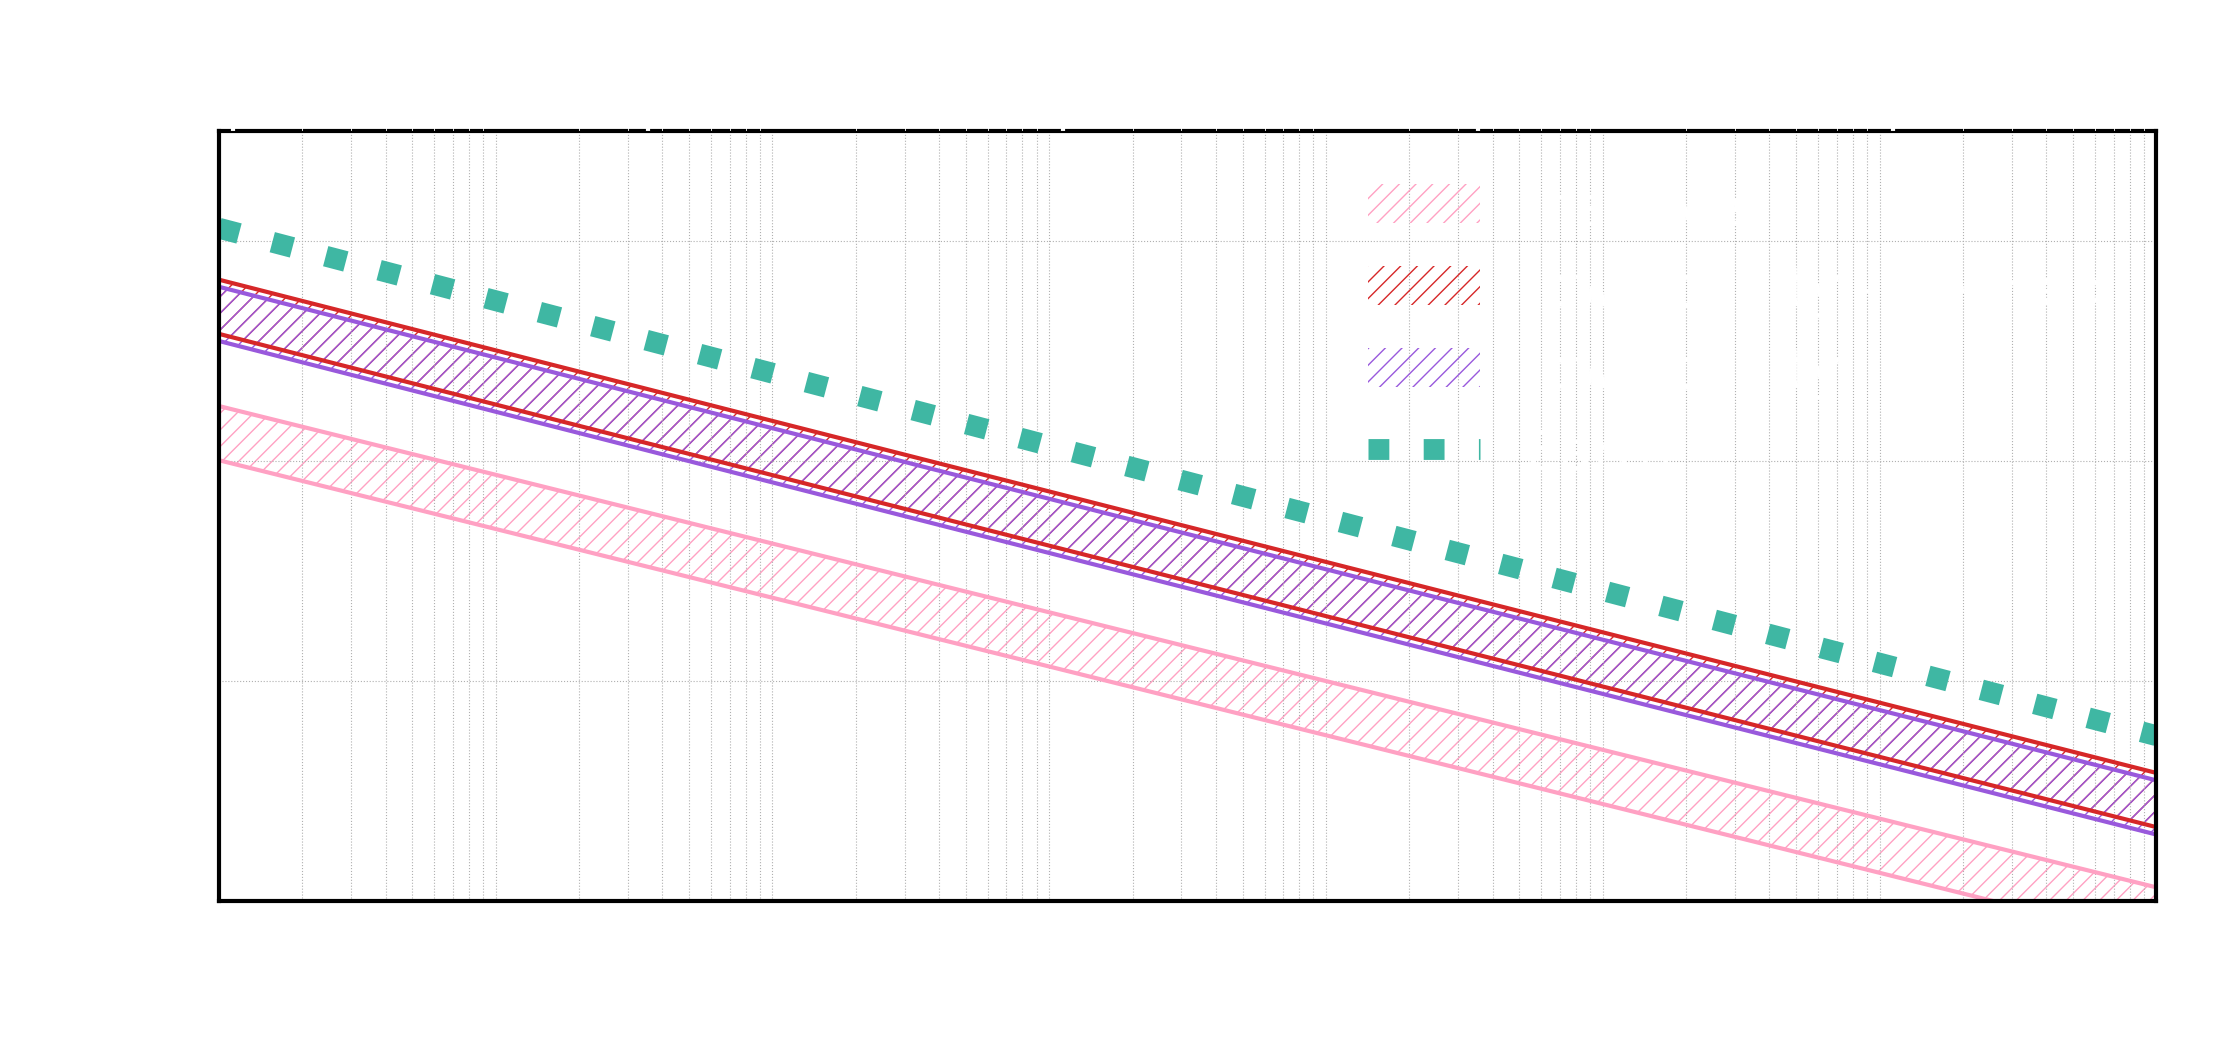

In [73]:

for i in [12]:#range(0,12,1):

    # ======== MAKE FIGURE ========
    #fig, ax = subplots(1, 1, figsize=(15,10))
    fig, ax = subplots(1, 1, figsize=(25,10))

    font = {'family' : 'avenir','size'   : 40,}

    plt.rc('font', **font)
    
    x_min_seismic_moment = 1e15
    x_max_seismic_moment = 1e22

    y_plot_min           = 1e-2
    y_plot_max           = 1e5
    
    alpha_number = 0.25

    if(plot_reference_lines_moment_magnitudes == 1):
        # Plot vertical line 
        ax.plot([np.power(10,1.5*3+9.05), np.power(10,1.5*3+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*4+9.05), np.power(10,1.5*4+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*5+9.05), np.power(10,1.5*5+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*6+9.05), np.power(10,1.5*6+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*7+9.05), np.power(10,1.5*7+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*8+9.05), np.power(10,1.5*8+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
        ax.plot([np.power(10,1.5*9+9.05), np.power(10,1.5*9+9.05)], [y_plot_min, y_plot_max], linewidth=2, linestyle=':', color=colour_Global)
    
    if(plot_Earth_reference_line == 1 and not i == 12):
        # Plot reference line of Earth's seismicity
        ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal), pow(10,np.log10(x_max_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal)], linewidth=5, linestyle=':', color=colour_Global)
   
    if(i == 12):
        
        # EARTH + VENUS GLOBAL ONLY
        COLOR = 'white'
        plt.rc('text', color=COLOR)
        plt.rc('axes', labelcolor=COLOR)
        plt.rc('xtick', color=COLOR)
        plt.rc('ytick', color=COLOR)
        #mpl.rcParams['axes.labelcolor'] = COLOR
        #mpl.rcParams['xtick.color'] = COLOR
        #mpl.rcParams['ytick.color'] = COLOR
        
        # Plot Earth data from CMT catalogue 
        #ax.plot(xCmt, yCmt, linewidth=8, color=colour_Global)
        
        # https://davidmathlogic.com/colorblind/#%23FFA1C3-%23BB3968-%23731235-%233FB7A3
        import matplotlib.colors
        colour_Global = matplotlib.colors.to_rgb('#3FB7A3')
        colour_Global_inactive = matplotlib.colors.to_rgb('#FFA1C3')
        colour_Global_active_low = matplotlib.colors.to_rgb('#9959DC')
        colour_Global_active_low_anna = 'tab:red'
        colour_Global_active_high = matplotlib.colors.to_rgb('#3B1071')
        
        
        ax.fill_between(venus_inactive_x, venus_inactive_y_min, venus_inactive_y_max, label='inactive', color=colour_Global_inactive, hatch='//', edgecolor='None',alpha=0)
        ax.plot(venus_inactive_x,       venus_inactive_y_min,       linewidth=3, color=colour_Global_inactive)
        ax.plot(venus_inactive_x,       venus_inactive_y_max,       linewidth=3, color=colour_Global_inactive)
        
        ax.fill_between(venus_active_low_anna_x, venus_active_low_anna_y_min, venus_active_low_anna_y_max, label='low activity - Refined', color=colour_Global_active_low_anna, hatch='//', edgecolor='None',alpha=0)
        ax.plot(venus_active_low_anna_x, venus_active_low_anna_y_min, linewidth=3, color=colour_Global_active_low_anna)
        ax.plot(venus_active_low_anna_x, venus_active_low_anna_y_max, linewidth=3, color=colour_Global_active_low_anna)

        ax.fill_between(venus_active_low_x, venus_active_low_y_min, venus_active_low_y_max, label='low activity', color=colour_Global_active_low, hatch='//', edgecolor='None',alpha=0)
        ax.plot(venus_active_low_x, venus_active_low_y_min, linewidth=3, color=colour_Global_active_low)
        ax.plot(venus_active_low_x, venus_active_low_y_max, linewidth=3, color=colour_Global_active_low)
        
        """
        ax.fill_between(venus_active_high_x, venus_active_high_y_min, venus_active_high_y_max, label='high activity', color=colour_Global_active_high, hatch='//', edgecolor='None',alpha=0) #
        ax.plot(venus_active_high_x, venus_active_high_y_min, linewidth=3, color=colour_Global_active_high)
        ax.plot(venus_active_high_x, venus_active_high_y_max, linewidth=3, color=colour_Global_active_high)
        """

        ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal), pow(10,np.log10(x_max_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal)], linewidth=15, label='Earth', linestyle=':', color=colour_Global)
        
        ax.legend(frameon=False)
        #cbar.ax.tick_params(axis='both', colors=color_labels, labelsize=fontsize)
    
    if(i == 0):
        # EARTH
    
        # Plot Earth data from CMT catalogue 
        ax.plot(xCmt, yCmt, linewidth=8, color=colour_Global)

        # Plot the seismic contributions according to tectonic setting from CMT catalogue
        ax.plot(xSubduction,       ySubduction,       linewidth=8, color=colour_Subduction)
        ax.plot(xCollision,        yCollision,        linewidth=8, color=colour_Collision)
        ax.plot(xTransform,        yTransform,        linewidth=8, color=colour_Transform)
        ax.plot(xRifts,            yRifts,            linewidth=8, color=colour_Rifts)
        ax.plot(xRidges,           yRidges,           linewidth=8, color=colour_Ridges)
        ax.plot(xIntraOceanic,     yIntraOceanic,     linewidth=8, color=colour_IntraOceanic)
        ax.plot(xIntraContinental, yIntraContinental, linewidth=8, color=colour_IntraContinental)
        #ax.plot(xIntraPlate,       yIntraPlate,       linewidth=5, color=colour_IntraPlate)
    
        # plot slopes of Earth data for each tectonic setting 
        if(plot_Earth_slopes == 1):
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal), pow(10,np.log10(x_max_seismic_moment)*slope_EarthGlobal+intercept_EarthGlobal)], linewidth=3, linestyle='--', color=colour_Global, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthSubduction+intercept_EarthSubduction), pow(10,np.log10(x_max_seismic_moment)*slope_EarthSubduction+intercept_EarthSubduction)], linewidth=3, linestyle='--', color=colour_Subduction, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthCollision+intercept_EarthCollision), pow(10,np.log10(x_max_seismic_moment)*slope_EarthCollision+intercept_EarthCollision)], linewidth=3, linestyle='--', color=colour_Collision, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthTransform+intercept_EarthTransform), pow(10,np.log10(x_max_seismic_moment)*slope_EarthTransform+intercept_EarthTransform)], linewidth=3, linestyle='--', color=colour_Transform, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthRifts+intercept_EarthRifts), pow(10,np.log10(x_max_seismic_moment)*slope_EarthRifts+intercept_EarthRifts)], linewidth=3, linestyle='--', color=colour_Rifts, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthRidges+intercept_EarthRidges), pow(10,np.log10(x_max_seismic_moment)*slope_EarthRidges+intercept_EarthRidges)], linewidth=3, linestyle='--', color=colour_Ridges, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthIntraOceanic+intercept_EarthIntraOceanic), pow(10,np.log10(x_max_seismic_moment)*slope_EarthIntraOceanic+intercept_EarthIntraOceanic)], linewidth=3, linestyle='--', color=colour_IntraOceanic, alpha=0.5)
            ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthIntraContinental+intercept_EarthIntraContinental), pow(10,np.log10(x_max_seismic_moment)*slope_EarthIntraContinental+intercept_EarthIntraContinental)], linewidth=3, linestyle='--', color=colour_IntraContinental, alpha=0.5)
            #ax.plot([x_min_seismic_moment, x_max_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_EarthIntraPlate+intercept_EarthIntraPlate), pow(10,np.log10(x_max_seismic_moment)*slope_EarthIntraPlate+intercept_EarthIntraPlate)], linewidth=3, linestyle='--', color=colour_IntraPlate, alpha=0.5)
  
    if(i == 1):

        # VENUS - INACTIVE  

        if(plot_Venus_scaled == 1):
            # Venus - data literally scaled from Earth 
            ax.plot(venus_inactive_x,       venus_inactive_y_min,       linewidth=3, color=colour_Global)
            ax.plot(venus_inactive_x,       venus_inactive_y_max,       linewidth=3, color=colour_Global)
        
        # plot range  
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_inactive_min+intercept_venus_inactive_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_inactive_min+intercept_venus_inactive_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_inactive_max+intercept_venus_inactive_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_inactive_max+intercept_venus_inactive_max)], color=colour_IntraContinental, edgecolor='None',alpha=0.25)
        ax.fill_between(venus_inactive_x, venus_inactive_y_min, venus_inactive_y_max, color=colour_Global, hatch='//', edgecolor='None',alpha=0)
    
        ax.plot(venus_inactive_x, venus_inactive_y_min, linewidth=3, color=colour_Global)
        ax.plot(venus_inactive_x, venus_inactive_y_max, linewidth=3, color=colour_Global) 
    
    
    if(i == 2):
        # VENUS - ACTIVE - lower bound

        if(plot_Venus_scaled == 1):
            # Venus - data literally scaled from Earth 
            ax.plot(venus_active_low_coronae_x_min, venus_active_low_coronae_y_min, linewidth=1, color=colour_Subduction)
            ax.plot(venus_active_low_coronae_x_max, venus_active_low_coronae_y_max, linewidth=2, color=colour_Subduction)

            ax.plot(venus_active_low_ridges_x_min, venus_active_low_ridges_y_min, linewidth=1, color=colour_Collision)
            ax.plot(venus_active_low_ridges_x_max, venus_active_low_ridges_y_max, linewidth=2, color=colour_Collision)
     
            ax.plot(venus_active_low_rifts_x_min, venus_active_low_rifts_y_min, linewidth=1, color=colour_Rifts)
            ax.plot(venus_active_low_rifts_x_max, venus_active_low_rifts_y_max, linewidth=2, color=colour_Rifts)
     
            ax.plot(venus_active_low_intraplate_x_min, venus_active_low_intraplate_y_min, linewidth=1, color=colour_IntraContinental)
            ax.plot(venus_active_low_intraplate_x_max, venus_active_low_intraplate_y_max, linewidth=2, color=colour_IntraContinental)
        
        # plot range
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_intraplate_min+intercept_venus_active_low_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_intraplate_min+intercept_venus_active_low_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_intraplate_max+intercept_venus_active_low_intraplate_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_intraplate_max+intercept_venus_active_low_intraplate_max)], color=colour_IntraContinental, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_ridges_min+intercept_venus_active_low_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_ridges_min+intercept_venus_active_low_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_ridges_max+intercept_venus_active_low_ridges_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_ridges_max+intercept_venus_active_low_ridges_max)], color=colour_Collision, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_rifts_min+intercept_venus_active_low_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_rifts_min+intercept_venus_active_low_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_rifts_max+intercept_venus_active_low_rifts_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_rifts_max+intercept_venus_active_low_rifts_max)], color=colour_Rifts, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_coronae_min+intercept_venus_active_low_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_coronae_min+intercept_venus_active_low_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_coronae_max+intercept_venus_active_low_coronae_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_coronae_max+intercept_venus_active_low_coronae_max)], color=colour_Subduction, edgecolor='None',alpha=alpha_number)
        ax.fill_between(venus_active_low_x, venus_active_low_y_min, venus_active_low_y_max, color=colour_Global, hatch='//', edgecolor='None',alpha=0)
    
        ax.plot(venus_active_low_x, venus_active_low_y_min, linewidth=3, color=colour_Global)
        ax.plot(venus_active_low_x, venus_active_low_y_max, linewidth=3, color=colour_Global)
    
    
    if(i == 3):
        # VENUS - ACTIVE - upper bound
        
        if(plot_Venus_scaled == 1):
            # Venus - data literally scaled from Earth 
            ax.plot(venus_active_high_coronae_x_min, venus_active_high_coronae_y_min, linewidth=1, color=colour_Subduction)
            ax.plot(venus_active_high_coronae_x_max, venus_active_high_coronae_y_max, linewidth=2, color=colour_Subduction)

            ax.plot(venus_active_high_ridges_x_min, venus_active_high_ridges_y_min, linewidth=1, color=colour_Collision)
            ax.plot(venus_active_high_ridges_x_max, venus_active_high_ridges_y_max, linewidth=2, color=colour_Collision)
     
            ax.plot(venus_active_high_rifts_x_min, venus_active_high_rifts_y_min, linewidth=1, color=colour_Rifts)
            ax.plot(venus_active_high_rifts_x_max, venus_active_high_rifts_y_max, linewidth=2, color=colour_Rifts)
     
            ax.plot(venus_active_high_intraplate_x_min, venus_active_high_intraplate_y_min, linewidth=1, color=colour_IntraContinental)
            ax.plot(venus_active_high_intraplate_x_max, venus_active_high_intraplate_y_max, linewidth=2, color=colour_IntraContinental)
        
        # plot range
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max)], color=colour_IntraContinental, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_ridges_min+intercept_venus_active_high_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_ridges_min+intercept_venus_active_high_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_ridges_max+intercept_venus_active_high_ridges_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_ridges_max+intercept_venus_active_high_ridges_max)], color=colour_Collision, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_rifts_min+intercept_venus_active_high_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_rifts_min+intercept_venus_active_high_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_rifts_max+intercept_venus_active_high_rifts_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_rifts_max+intercept_venus_active_high_rifts_max)], color=colour_Rifts, edgecolor='None',alpha=alpha_number)
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_coronae_min+intercept_venus_active_high_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_coronae_min+intercept_venus_active_high_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_coronae_max+intercept_venus_active_high_coronae_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_coronae_max+intercept_venus_active_high_coronae_max)], color=colour_Subduction, edgecolor='None',alpha=alpha_number)
        ax.fill_between(venus_active_high_x, venus_active_high_y_min, venus_active_high_y_max, color=colour_Global, hatch='//', edgecolor='None',alpha=0) #
    
        ax.plot(venus_active_high_x, venus_active_high_y_min, linewidth=3, color=colour_Global)
        ax.plot(venus_active_high_x, venus_active_high_y_max, linewidth=3, color=colour_Global)
    
    if(i == 4):
        # VENUS - ACTIVE - lower bound - corona
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_coronae_min+intercept_venus_active_low_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_coronae_min+intercept_venus_active_low_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_coronae_max+intercept_venus_active_low_coronae_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_coronae_max+intercept_venus_active_low_coronae_max)], color=colour_Subduction, edgecolor='None',alpha=alpha_number)
  
    if(i == 5):
        # VENUS - ACTIVE - lower bound - rift   
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_rifts_min+intercept_venus_active_low_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_rifts_min+intercept_venus_active_low_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_rifts_max+intercept_venus_active_low_rifts_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_rifts_max+intercept_venus_active_low_rifts_max)], color=colour_Rifts, edgecolor='None',alpha=alpha_number)

    if(i == 6):
        # VENUS - ACTIVE - lower bound - ridge
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_ridges_min+intercept_venus_active_low_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_ridges_min+intercept_venus_active_low_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_ridges_max+intercept_venus_active_low_ridges_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_ridges_max+intercept_venus_active_low_ridges_max)], color=colour_Collision, edgecolor='None',alpha=alpha_number)
        
    if(i == 7):
        # VENUS - ACTIVE - lower bound - intraplate 
            ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_intraplate_min+intercept_venus_active_low_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_intraplate_min+intercept_venus_active_low_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_low_intraplate_max+intercept_venus_active_low_intraplate_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_low_intraplate_max+intercept_venus_active_low_intraplate_max)], color=colour_IntraContinental, edgecolor='None',alpha=alpha_number)
    
    if(i == 8):
        # VENUS - ACTIVE - upper bound - corona
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_coronae_min+intercept_venus_active_high_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_coronae_min+intercept_venus_active_high_coronae_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_coronae_max+intercept_venus_active_high_coronae_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_coronae_max+intercept_venus_active_high_coronae_max)], color=colour_Subduction, edgecolor='None',alpha=alpha_number)
        
    if(i == 9):
        # VENUS - ACTIVE - upper bound - rift
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_rifts_min+intercept_venus_active_high_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_rifts_min+intercept_venus_active_high_rifts_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_rifts_max+intercept_venus_active_high_rifts_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_rifts_max+intercept_venus_active_high_rifts_max)], color=colour_Rifts, edgecolor='None',alpha=alpha_number)

    if(i == 10):
        # VENUS - ACTIVE - upper bound - ridge
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_ridges_min+intercept_venus_active_high_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_ridges_min+intercept_venus_active_high_ridges_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_ridges_max+intercept_venus_active_high_ridges_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_ridges_max+intercept_venus_active_high_ridges_max)], color=colour_Collision, edgecolor='None',alpha=alpha_number)
        
    if(i == 11):
        # VENUS - ACTIVE - upper bound - intraplate
        ax.fill([x_min_seismic_moment, x_max_seismic_moment, x_max_seismic_moment, x_min_seismic_moment], [pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max)], color=colour_IntraContinental, edgecolor='None',alpha=alpha_number) 

    ax.set_xlabel(r'Seismic Moment M$_0$ (N m)') # X label
    ax.set_ylabel(r'Number of quakes per year $\geq$M$_0$') # X label
    ax.tick_params(axis="x")
    ax.tick_params(axis="y")
    ax.grid(linestyle=':', which="both")

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)

    ax.set_ylim(y_plot_min,y_plot_max)
    ax.set_xlim(x_min_seismic_moment,x_max_seismic_moment)

    ax.tick_params(length=10, width=3, which="major")
    ax.tick_params(length=5, which="minor")

    # make an upper axis of the moment magnitude scale from the known seismic moment 
    start_moment_magnitude = 4
    end_moment_magnitude   = 9
    seismic_moment_tick    = [0] * (end_moment_magnitude - start_moment_magnitude)
    moment_magnitude_tick  = [0] * (end_moment_magnitude - start_moment_magnitude)
    for moment_magnitude in range(start_moment_magnitude,end_moment_magnitude,1):
        seismic_moment_tick[moment_magnitude-start_moment_magnitude]   = np.power(10,1.5 * moment_magnitude + 9.05)
        moment_magnitude_tick[moment_magnitude-start_moment_magnitude] = moment_magnitude  

    ax2 = ax.twiny()
    ax2.set_xscale('log')
    new_tick_locations = seismic_moment_tick

    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(moment_magnitude_tick)
    ax2.set_xlabel(r"Moment magnitude M$_w$")

    ax2.tick_params(length=10, width=3, which="major")
    ax2.tick_params(length=5, which="minor")

    print(f'Saving {i}')
    if  (i == 0):
        plt.savefig("Earth_annual_seismicity.png",             dpi=300)
    elif(i == 1):
        plt.savefig("Venus_inactive_annual_seismicity.png",    dpi=300)
    elif(i == 2):
        plt.savefig("Venus_active_lower_bound_seismicity.png", dpi=300)
    elif(i == 3):
        plt.savefig("Venus_active_upper_bound_seismicity.png", dpi=300)
    elif(i == 4):
        plt.savefig("corona-Venus_active_lower_bound_seismicity.png",     dpi=300)
    elif(i == 5):
        plt.savefig("rift-Venus_active_lower_bound_seismicity.png",      dpi=300)
    elif(i == 6):
        plt.savefig("ridge-Venus_active_lower_bound_seismicity.png",       dpi=300)
    elif(i == 7):
        plt.savefig("intraplate-Venus_active_lower_bound_seismicity.png", dpi=300)
    elif(i == 8):
        plt.savefig("corona-Venus_active_upper_bound_seismicity.png",     dpi=300)
    elif(i == 9):
        plt.savefig("rift-Venus_active_upper_bound_seismicity.png",      dpi=300)
    elif(i == 10):
        plt.savefig("ridge-Venus_active_upper_bound_seismicity.png",       dpi=300)
    elif(i == 11):
        plt.savefig("intraplate-Venus_active_upper_bound_seismicity.png", dpi=300)
    elif(i == 12):
        print('Saving')
        plt.savefig("./global_Venus_Earth_Anna.png", dpi=800, transparent=True)
    

In [12]:
[pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_min+intercept_venus_active_high_intraplate_min), pow(10,np.log10(x_max_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max), pow(10,np.log10(x_min_seismic_moment)*slope_venus_active_high_intraplate_max+intercept_venus_active_high_intraplate_max)]

[84.33660461146704,
 0.0035485264340630283,
 0.011034458911401535,
 262.2521814630554]

In [13]:
from pyrocko import moment_tensor as mtm

pd_slopes = pd.DataFrame()
slopes = dict(
    intraplate = slope_venus_inactive_max,
    type_setting = 'inactive_max',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    intraplate = slope_venus_inactive_min,
    type_setting = 'inactive_min',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    intraplate = intercept_venus_inactive_max,
    type_setting = 'inactive_max',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    intraplate = intercept_venus_inactive_min,
    type_setting = 'inactive_min',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    coronae = slope_venus_active_high_coronae_max,
    intraplate = slope_venus_active_high_intraplate_max,
    ridges = slope_venus_active_high_ridges_max,
    rifts = slope_venus_active_high_rifts_max,
    type_setting = 'active_high_max',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    coronae = slope_venus_active_high_coronae_min,
    intraplate = slope_venus_active_high_intraplate_min,
    ridges = slope_venus_active_high_ridges_min,
    rifts = slope_venus_active_high_rifts_min,
    type_setting = 'active_high_min',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    coronae = slope_venus_active_low_coronae_max,
    intraplate = slope_venus_active_low_intraplate_max,
    ridges = slope_venus_active_low_ridges_max,
    rifts = slope_venus_active_low_rifts_max,
    type_setting = 'active_low_max',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

slopes = dict(
    coronae = slope_venus_active_low_coronae_min,
    intraplate = slope_venus_active_low_intraplate_min,
    ridges = slope_venus_active_low_ridges_min,
    rifts = slope_venus_active_low_rifts_min,
    type_setting = 'active_low_min',
    type_unknown = 'slope'
)
pd_slopes = pd_slopes.append([slopes])

intercepts = dict(
    coronae = intercept_venus_active_low_coronae_max,
    intraplate = intercept_venus_active_low_intraplate_max,
    ridges = intercept_venus_active_low_ridges_max,
    rifts = intercept_venus_active_low_rifts_max,
    type_setting = 'active_low_max',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([intercepts])

intercepts = dict(
    coronae = intercept_venus_active_low_coronae_min,
    intraplate = intercept_venus_active_low_intraplate_min,
    ridges = intercept_venus_active_low_ridges_min,
    rifts = intercept_venus_active_low_rifts_min,
    type_setting = 'active_low_min',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([intercepts])

intercepts = dict(
    coronae = intercept_venus_active_high_coronae_max,
    intraplate = intercept_venus_active_high_intraplate_max,
    ridges = intercept_venus_active_high_ridges_max,
    rifts = intercept_venus_active_high_rifts_max,
    type_setting = 'active_high_max',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([intercepts])

intercepts = dict(
    coronae = intercept_venus_active_high_coronae_min,
    intraplate = intercept_venus_active_high_intraplate_min,
    ridges = intercept_venus_active_high_ridges_min,
    rifts = intercept_venus_active_high_rifts_min,
    type_setting = 'active_high_min',
    type_unknown = 'intercept'
)
pd_slopes = pd_slopes.append([intercepts])
pd_slopes.reset_index(drop=True, inplace=True)
print(pd_slopes)
pd_slopes.to_csv('/staff/quentin/Documents/Projects/2023_Celine_internship/Venus_data/distribution_venus_per_mw.csv', header=True, index=False)

mw = 7.
print(f'Magnitude {mw}')
for tecto in slopes:
    if 'type' in tecto:
        continue
    slope = slopes[tecto]
    intercept = intercepts[tecto]
    func = lambda mw: 10**(np.log10(mtm.magnitude_to_moment(mw))*slope+intercept)
    print(f'{tecto}: {func(mw)}')

    intraplate     type_setting type_unknown    coronae     ridges      rifts
0    -0.625138     inactive_max        slope        NaN        NaN        NaN
1    -0.625138     inactive_min        slope        NaN        NaN        NaN
2    11.880156     inactive_max    intercept        NaN        NaN        NaN
3    11.387453     inactive_min    intercept        NaN        NaN        NaN
4    -0.625138  active_high_max        slope  -0.638265  -0.616840  -0.889845
5    -0.625138  active_high_min        slope  -0.638265  -0.616840  -0.889845
6    -0.625138   active_low_max        slope  -0.638265  -0.616840  -0.688890
7    -0.625138   active_low_min        slope  -0.638265  -0.616840  -0.688890
8    11.824377   active_low_max    intercept  13.015772  11.614797  13.102855
9    11.331674   active_low_min    intercept  12.523069  11.122094  12.610152
10   11.795794  active_high_max    intercept  13.571422  11.614797  17.292551
11   11.303091  active_high_min    intercept  13.078719  11.1220

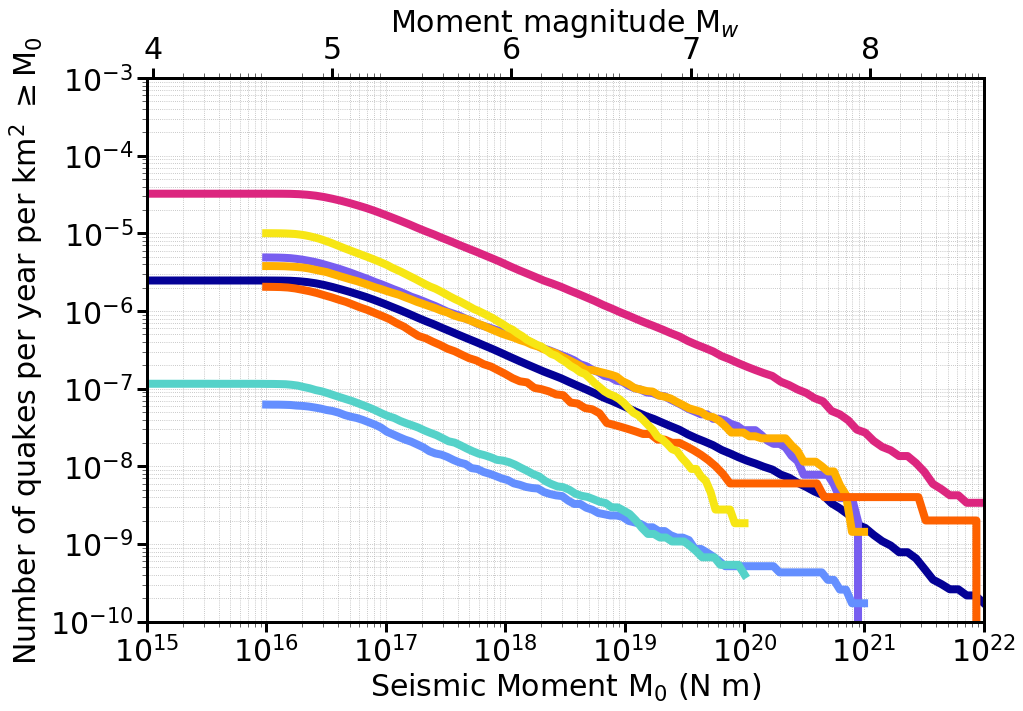

In [14]:
# EARTH - Seismicity rates (i.e., Earth size-frequency divided by surface areas) 

plot_seismic_rate_Earth_total            = np.zeros(resolution)
plot_seismic_rate_Earth_subduction       = np.zeros(resolution)
plot_seismic_rate_Earth_collision        = np.zeros(resolution)
plot_seismic_rate_Earth_transform        = np.zeros(resolution)
plot_seismic_rate_Earth_rifts            = np.zeros(resolution)
plot_seismic_rate_Earth_ridges           = np.zeros(resolution)
plot_seismic_rate_Earth_intraoceanic     = np.zeros(resolution)
plot_seismic_rate_Earth_intracontinental = np.zeros(resolution)

for i in range(0,resolution,1):
    plot_seismic_rate_Earth_total[i]            = yCmt[i]              / area_Earth_total
    plot_seismic_rate_Earth_subduction[i]       = ySubduction[i]       / area_Earth_subduction
    plot_seismic_rate_Earth_collision[i]        = yCollision[i]        / area_Earth_collision
    plot_seismic_rate_Earth_transform[i]        = yTransform[i]        / area_Earth_transform
    plot_seismic_rate_Earth_rifts[i]            = yRifts[i]            / area_Earth_rifts
    plot_seismic_rate_Earth_ridges[i]           = yRidges[i]           / area_Earth_ridges
    plot_seismic_rate_Earth_intraoceanic[i]     = yIntraOceanic[i]     / area_Earth_intraoceanic
    plot_seismic_rate_Earth_intracontinental[i] = yIntraContinental[i] / area_Earth_intracontinental

    
fig, ax = subplots(1, 1, figsize=(15,10))

font = {'family' : 'avenir','size'   : 30}

plt.rc('font', **font)
        
# Plot Earth data from CMT catalogue 
ax.plot(xCmt, plot_seismic_rate_Earth_total, linewidth=8, color=colour_Global)

# Plot the seismic contributions according to tectonic setting from CMT catalogue
ax.plot(xSubduction,       plot_seismic_rate_Earth_subduction,       linewidth=8, color=colour_Subduction)
ax.plot(xCollision,        plot_seismic_rate_Earth_collision,        linewidth=8, color=colour_Collision)
ax.plot(xTransform,        plot_seismic_rate_Earth_transform,        linewidth=8, color=colour_Transform)
ax.plot(xRifts,            plot_seismic_rate_Earth_rifts,            linewidth=8, color=colour_Rifts)
ax.plot(xRidges,           plot_seismic_rate_Earth_ridges,           linewidth=8, color=colour_Ridges)
ax.plot(xIntraOceanic,     plot_seismic_rate_Earth_intraoceanic,     linewidth=8, color=colour_IntraOceanic)
ax.plot(xIntraContinental, plot_seismic_rate_Earth_intracontinental, linewidth=8, color=colour_IntraContinental)
    
ax.set_xlabel(r'Seismic Moment M$_0$ (N m)') # X label
ax.set_ylabel(r'Number of quakes per year per km$^2$ $\geq$M$_0$') # X label
ax.tick_params(axis="x")
ax.tick_params(axis="y")
ax.grid(linestyle=':', which="both")

ax.set_yscale('log')
ax.set_xscale('log')

ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

ax.set_ylim(1e-10,1e-3)
ax.set_xlim(x_min_seismic_moment,x_max_seismic_moment)

ax.tick_params(length=10, width=3, which="major")
ax.tick_params(length=5, which="minor")


# make an upper axis of the moment magnitude scale from the known seismic moment 
start_moment_magnitude = 4
end_moment_magnitude   = 9
seismic_moment_tick    = [0] * (end_moment_magnitude - start_moment_magnitude)
moment_magnitude_tick  = [0] * (end_moment_magnitude - start_moment_magnitude)
for moment_magnitude in range(start_moment_magnitude,end_moment_magnitude,1):
    seismic_moment_tick[moment_magnitude-start_moment_magnitude]   = np.power(10,1.5 * moment_magnitude + 9.05)
    moment_magnitude_tick[moment_magnitude-start_moment_magnitude] = moment_magnitude  

ax2 = ax.twiny()
ax2.set_xscale('log')
new_tick_locations = seismic_moment_tick

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(moment_magnitude_tick)
ax2.set_xlabel(r"Moment magnitude M$_w$")

ax2.tick_params(length=10, width=3, which="major")
ax2.tick_params(length=5, which="minor")

plt.savefig("Earth_seismic_rates.png", dpi=300)

In [15]:
# calculate how many earthquakes equal to or bigger than a certain moment magnitude 
# are expected in a year for different tectonic settings 

for i in range(0,3,1):

    for moment_magnitude in range(3,10,1):
        seismic_moment   = np.power(10,1.5*moment_magnitude+9.05)
    
        if(i == 0):
            # Inactive Venus

            if(moment_magnitude == 3):
                print("--- INACTIVE VENUS ---")
        
            slope_min     = slope_venus_inactive_min
            intercept_min = intercept_venus_inactive_min
        
            slope_max     = slope_venus_inactive_max
            intercept_max = intercept_venus_inactive_max
            
            number_of_quakes_min = pow(10,np.log10(seismic_moment)*slope_min+intercept_min)
            number_of_quakes_max = pow(10,np.log10(seismic_moment)*slope_max+intercept_max)
            
        if(i == 1):
            # Active Venus - lower bound

            if(moment_magnitude == 3):
                print(" ")
                print("--- ACTIVE VENUS - lower bound ---")
        
            for m in range(0,resolution-1,1):
                if(venus_active_low_x[m] < seismic_moment and venus_active_low_x[m+1] > seismic_moment):
                    
                    number_of_quakes_min = ((1-((seismic_moment - venus_active_low_x[m])/(venus_active_low_x[m+1]-venus_active_low_x[m]))) * venus_active_low_y_min[m] ) + ((1-((venus_active_low_x[m+1] - seismic_moment)/(venus_active_low_x[m+1]-venus_active_low_x[m]))) * venus_active_low_y_min[m+1] )
                    number_of_quakes_max = ((1-((seismic_moment - venus_active_low_x[m])/(venus_active_low_x[m+1]-venus_active_low_x[m]))) * venus_active_low_y_max[m] ) + ((1-((venus_active_low_x[m+1] - seismic_moment)/(venus_active_low_x[m+1]-venus_active_low_x[m]))) * venus_active_low_y_max[m+1] )
            
        if(i == 2):
            # Active Venus - upper bound

            if(moment_magnitude == 3):
                print(" ")
                print("--- ACTIVE VENUS - upper bound ---")
        
            for m in range(0,resolution-1,1):
                if(venus_active_high_x[m] < seismic_moment and venus_active_high_x[m+1] > seismic_moment):
                    
                    number_of_quakes_min = ((1-((seismic_moment - venus_active_high_x[m])/(venus_active_high_x[m+1]-venus_active_high_x[m]))) * venus_active_high_y_min[m] ) + ((1-((venus_active_high_x[m+1] - seismic_moment)/(venus_active_high_x[m+1]-venus_active_high_x[m]))) * venus_active_high_y_min[m+1] )
                    number_of_quakes_max = ((1-((seismic_moment - venus_active_high_x[m])/(venus_active_high_x[m+1]-venus_active_high_x[m]))) * venus_active_high_y_max[m] ) + ((1-((venus_active_high_x[m+1] - seismic_moment)/(venus_active_high_x[m+1]-venus_active_high_x[m]))) * venus_active_high_y_max[m+1] )

        if(moment_magnitude == 4):
            seismic_rate_min = number_of_quakes_min / area_Venus_total 
            seismic_rate_max = number_of_quakes_max / area_Venus_total
                    
        print("Number of quakes > Mw",moment_magnitude,"per year:",round(number_of_quakes_min,2),"-",round(number_of_quakes_max,2))

    print(" ")
    print("Minimum seismic rate:",round(seismic_rate_min*pow(10,6),2),"  x10^-6 /km2/year")
    print("Maximum seismic rate:",round(seismic_rate_max*pow(10,6),2),"  x10^-6 /km2/year")
        


--- INACTIVE VENUS ---
Number of quakes > Mw 3 per year: 825.71 - 2567.63
Number of quakes > Mw 4 per year: 95.31 - 296.36
Number of quakes > Mw 5 per year: 11.0 - 34.21
Number of quakes > Mw 6 per year: 1.27 - 3.95
Number of quakes > Mw 7 per year: 0.15 - 0.46
Number of quakes > Mw 8 per year: 0.02 - 0.05
Number of quakes > Mw 9 per year: 0.0 - 0.01
 
Minimum seismic rate: 0.21   x10^-6 /km2/year
Maximum seismic rate: 0.64   x10^-6 /km2/year
 
--- ACTIVE VENUS - lower bound ---
Number of quakes > Mw 3 per year: 10760.11 - 33459.53
Number of quakes > Mw 4 per year: 1160.51 - 3608.71
Number of quakes > Mw 5 per year: 125.62 - 390.62
Number of quakes > Mw 6 per year: 13.65 - 42.43
Number of quakes > Mw 7 per year: 1.5 - 4.66
Number of quakes > Mw 8 per year: 0.16 - 0.51
Number of quakes > Mw 9 per year: 0.02 - 0.06
 
Minimum seismic rate: 2.52   x10^-6 /km2/year
Maximum seismic rate: 7.84   x10^-6 /km2/year
 
--- ACTIVE VENUS - upper bound ---
Number of quakes > Mw 3 per year: 84262.77 -

In [16]:
# calculate the seismic rate of the different tectonic settings of the Earth 

moment_magnitude = 4
seismic_moment   = np.power(10,1.5*moment_magnitude+9.05)

print("Seismic rates for different tectonic settings on Earth")
print("--> Amount of Mw",moment_magnitude," earthquakes per km2 per year")
print(" ")

for i in range(0,9,1):
    
    if  (i == 0):
        data_slope     = slope_EarthGlobal
        data_intercept = intercept_EarthGlobal
        
    elif(i == 1):
        data_slope     = slope_EarthSubduction 
        data_intercept = intercept_EarthSubduction 
        
    elif(i == 2):
        data_slope     = slope_EarthCollision
        data_intercept = intercept_EarthCollision
        
    elif(i == 3):
        data_slope     = slope_EarthTransform
        data_intercept = intercept_EarthTransform
        
    elif(i == 4):
        data_slope     = slope_EarthRifts
        data_intercept = intercept_EarthRifts
    
    elif(i == 5):
        data_slope     = slope_EarthRidges
        data_intercept = intercept_EarthRidges
        
    elif(i == 6):
        data_slope     = slope_EarthIntraOceanic
        data_intercept = intercept_EarthIntraOceanic
        
    elif(i == 7):
        data_slope     = slope_EarthIntraContinental
        data_intercept = intercept_EarthIntraContinental
    
    elif(i == 8):
        data_slope     = slope_EarthIntraPlate
        data_intercept = intercept_EarthIntraPlate
        
    
    # step 1: calculate for each tectonic setting what the amount of earthquakes is for a given magnitude 
    for m in range(0,resolution-1,1):
       #if(data_x[m] < seismic_moment and data_x[m+1] > seismic_moment):
            #number_of_quakes = ((1-((seismic_moment - data_x[m])/(data_x[m+1]-data_x[m]))) * data_y[m] ) + ((1-((data_x[m+1] - seismic_moment)/(data_x[m+1]-data_x[m]))) * data_y[m+1] )   
        number_of_quakes = pow(10,data_slope * np.log10(seismic_moment) + data_intercept)
            
    if  (i == 0):
        
        seismic_rate = number_of_quakes / area_Earth_total
        
        print("Global           ", round(seismic_rate*pow(10,6),2),"   x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
        
    elif(i == 1):
        
        seismic_rate = number_of_quakes / area_Earth_subduction
        
        print("Subduction:      ", round(seismic_rate*pow(10,6),2)," x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
        
    elif(i == 2):
        
        seismic_rate = number_of_quakes / area_Earth_collision
        
        print("Collision:       ", round(seismic_rate*pow(10,6),2),"  x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
     
    elif(i == 3):
        
        seismic_rate = number_of_quakes / area_Earth_transform
        
        print("Transform:       ", round(seismic_rate*pow(10,6),2),"  x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
   
    elif(i == 4):
        
        seismic_rate = number_of_quakes / area_Earth_rifts
        
        print("Rifts:           ", round(seismic_rate*pow(10,6),2),"  x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
     
    elif(i == 5):
        
        seismic_rate = number_of_quakes / area_Earth_ridges
        
        print("Ridges:          ", round(seismic_rate*pow(10,6),2),"  x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
     
    elif(i == 6):
        
        seismic_rate = number_of_quakes / area_Earth_intraoceanic
        
        print("Intraoceanic:    ", round(seismic_rate*pow(10,6),2),"   x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
     
    elif(i == 7):
        
        seismic_rate = number_of_quakes / area_Earth_intracontinental
        
        print("Intracontinental:", round(seismic_rate*pow(10,6),2),"   x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
 
    elif(i == 8):
        
        seismic_rate = number_of_quakes / area_Earth_intraplate_total
        
        print("Intraplate:      ", round(seismic_rate*pow(10,6),2),"   x10^-6 /km2/year    ||   number of earthquakes: ", round(number_of_quakes,2))
      

Seismic rates for different tectonic settings on Earth
--> Amount of Mw 4  earthquakes per km2 per year
 
Global            23.93    x10^-6 /km2/year    ||   number of earthquakes:  12207.0
Subduction:       306.84  x10^-6 /km2/year    ||   number of earthquakes:  8028.39
Collision:        33.62   x10^-6 /km2/year    ||   number of earthquakes:  383.13
Transform:        27.18   x10^-6 /km2/year    ||   number of earthquakes:  420.78
Rifts:            16.98   x10^-6 /km2/year    ||   number of earthquakes:  187.62
Ridges:           248.46   x10^-6 /km2/year    ||   number of earthquakes:  5956.87
Intraoceanic:     0.32    x10^-6 /km2/year    ||   number of earthquakes:  82.85
Intracontinental: 0.76    x10^-6 /km2/year    ||   number of earthquakes:  125.87
Intraplate:       0.48    x10^-6 /km2/year    ||   number of earthquakes:  204.42


In [17]:
# b-values 

print("Statistics on our Earth database")
print(" ")
print("-- EARTH --")
print("Earth Global:           ","b-value: ",round(-b_value_EarthGlobal,2),           "|| a-value: ", round(a_value_EarthGlobal,2))
print("Earth Subduction:       ","b-value: ",round(-b_value_EarthSubduction,2),       "|| a-value: ", round(a_value_EarthSubduction,2))
print("Earth Collision:        ","b-value: ",round(-b_value_EarthCollision,2),        "|| a-value: ", round(a_value_EarthCollision,2))
print("Earth Transform:        ","b-value: ",round(-b_value_EarthTransform,2),        "|| a-value: ", round(a_value_EarthTransform,2))
print("Earth Rifts:            ","b-value: ",round(-b_value_EarthRifts,2),            "|| a-value: ", round(a_value_EarthRifts,2))
print("Earth Ridges:           ","b-value: ",round(-b_value_EarthRidges,2),           "|| a-value: ", round(a_value_EarthRidges,2))
print("Earth Intraoceanic:     ","b-value: ",round(-b_value_EarthIntraOceanic,2),     "|| a-value: ", round(a_value_EarthIntraOceanic,2))
print("Earth Intracontinental: ","b-value: ",round(-b_value_EarthIntraContinental,2), "|| a-value: ", round(a_value_EarthIntraContinental,2))
print("Earth Intraplate:       ","b-value: ",round(-b_value_EarthIntraPlate,2),       "|| a-value: ", round(a_value_EarthIntraPlate,2))




Statistics on our Earth database
 
-- EARTH --
Earth Global:            b-value:  0.99 || a-value:  8.04
Earth Subduction:        b-value:  0.96 || a-value:  7.73
Earth Collision:         b-value:  0.93 || a-value:  6.28
Earth Transform:         b-value:  0.89 || a-value:  6.17
Earth Rifts:             b-value:  1.03 || a-value:  6.41
Earth Ridges:            b-value:  1.33 || a-value:  9.11
Earth Intraoceanic:      b-value:  0.84 || a-value:  5.29
Earth Intracontinental:  b-value:  0.94 || a-value:  5.85
Earth Intraplate:        b-value:  0.89 || a-value:  5.87


In [18]:
# calculate how many Mw 4 earthquakes there could be in the annual seismic moment release 
# estimates of Sabbeth et al. (2023) based on wrinkle ridges 

# Sabbeth et al. (2023) provide three different annual seismic moment release estimates: 
# 5.1 * 10^17 N m / year for a vertical slip extent assumption of 50 km 
# 3.7 * 10^17 N m / year for a vertical slip extent assumption of 30 km 
# 9.1 * 10^16 N m / year for a vertical slip extent assumption of 10 km 

moment_magnitude = 4 
seismic_moment   = np.power(10,1.5*moment_magnitude+9.05)

for i in range(0,3,1):

    if   (i == 0): 
        annual_seismic_moment_release = 5.1e17
    elif (i == 1):
        annual_seismic_moment_release = 3.7e17
    elif (i == 2):
        annual_seismic_moment_release = 9.1e16
    
    number_of_quakes = annual_seismic_moment_release / seismic_moment 
    
    print("An annual seismic moment release of ",annual_seismic_moment_release,"is equivalent to ",number_of_quakes," Mw",moment_magnitude," quakes")



An annual seismic moment release of  5.1e+17 is equivalent to  454.53797844820946  Mw 4  quakes
An annual seismic moment release of  3.7e+17 is equivalent to  329.76284710948534  Mw 4  quakes
An annual seismic moment release of  9.1e+16 is equivalent to  81.10383537017071  Mw 4  quakes
